In [1]:
%pip install icecream

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
print=ic


In [ ]:
class NonlinearElement2D:
    def  __init__(self, node_indeces, node_coordinates):
        self.node_indeces = node_indeces
        self.node_coordinates = node_coordinates


In [31]:
## code for term project

# given variables
# N,mm,MPa
b = h = 10
r = 2
t = 0.1e3 # N/mm




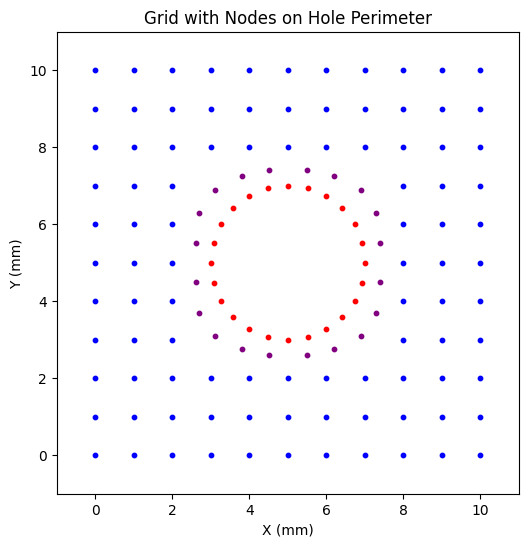

In [60]:
def generate_structured_points_with_hole(rect_size, hole_size, spacing):
    """
    Generate structured points inside a rectangle with a square hole at the center.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_size: tuple, dimensions of the square hole (width, height) in mm
    - spacing: float, distance between points in mm

    Returns:
    - points: numpy array of shape (N, 2), points inside the area excluding the hole
    """
    width, height = rect_size
    hole_width, hole_height = hole_size

    # Define the hole's bounds
    hole_x_min = (width - hole_width) / 2
    hole_x_max = (width + hole_width) / 2
    hole_y_min = (height - hole_height) / 2
    hole_y_max = (height + hole_height) / 2

    # Generate structured grid points
    x_coords = np.arange(0, width + spacing, spacing)
    y_coords = np.arange(0, height + spacing, spacing)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Filter out points inside the hole
    mask = ~((hole_x_min <= points[:, 0]) & (points[:, 0] <= hole_x_max) &
             (hole_y_min <= points[:, 1]) & (points[:, 1] <= hole_y_max))

    return points[mask]

def generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter):
    """
    Generate a grid of points with nodes on the perimeter of a hole inside the rectangle.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_radius: float, radius of the circular hole in mm
    - num_nodes_on_perimeter: int, number of nodes on the perimeter of the hole

    Returns:
    - points: numpy array of shape (N, 2), points in the grid with nodes on the hole's perimeter
    """
    width, height = rect_size
    # Define the center of the hole
    hole_center = (width / 2, height / 2)

    # Generate a grid of points within the rectangle
    x_coords = np.arange(0, width, 1)
    y_coords = np.arange(0, height, 1)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Generate nodes on the perimeter of the hole
    angles = np.linspace(0, 2 * np.pi, num_nodes_on_perimeter, endpoint=False)
    hole_x = hole_center[0] + hole_radius * np.cos(angles)
    hole_y = hole_center[1] + hole_radius * np.sin(angles)
    hole_points = np.column_stack((hole_x, hole_y))


    return hole_points

def mirror_points(points, x_mirror, y_mirror):
    mirrored_points = []

    for point in points:
        x, y = point

        # Mirror about x = 5
        mirrored_x = 2 * x_mirror - x

        # Mirror about y = 5
        mirrored_y = 2 * y_mirror - y

        mirrored_points.append([mirrored_x, mirrored_y])
        mirrored_points.append([x, mirrored_y])
        mirrored_points.append([mirrored_x, y])

    return np.array(mirrored_points)

# Parameters
rect_size = (10, 10)
hole_size = (5.9, 5.9)
spacing = 1

structured_nodes = generate_structured_points_with_hole(rect_size, hole_size, spacing)

hole_radius = 2
num_nodes_on_perimeter = 24
hole_perimeter_nodes = generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter)

unstructured_nodes = np.array([
    [2.6,4.5],
    [2.7,3.7],
    [3.1,3.1],
    [3.8,2.75],
    [4.5,2.6],
])


# Create mirrored points
mirrored_points = mirror_points(unstructured_nodes, x_mirror = 5, y_mirror = 5)
unstructured_nodes = np.vstack((unstructured_nodes, mirrored_points))

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(structured_nodes[:, 0], structured_nodes[:, 1], s=10, color='blue', label='Valid Points')
plt.scatter(hole_perimeter_nodes[:, 0], hole_perimeter_nodes[:, 1], s=10, color='red', label='Nodes on Hole Perimeter')

plt.scatter(unstructured_nodes[:, 0], unstructured_nodes[:, 1], s=10, color='purple', label='Unstructured Nodes')


#plt.gca().add_patch(plt.Circle((rect_size[0]/2, rect_size[1]/2), hole_radius, color='red', alpha=0.3, label='Hole'))
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Grid with Nodes on Hole Perimeter')
# plt.legend()
plt.show()